In [1]:
#Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import ttest_ind

#Установка стиля графиков из библиотеки seaborn
sns.set()
#Выведем больше строк и колонок
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
#Загрузим данные и рассмотрим их
cacao = pd.read_csv('cacao_flavors.csv')
display(cacao.head(10))
cacao.info(verbose = False)

Bar id Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0       1                   A. Morin                       Agua Grande  1876   
1       2                   A. Morin                             Kpime  1676   
2       3                   A. Morin                            Atsane  1676   
3       4                   A. Morin                             Akata  1680   
4       5                   A. Morin                            Quilla  1704   
5       6                   A. Morin                          Carenero  1315   
6       7                   A. Morin                              Cuba  1315   
7       8                   A. Morin                      Sur del Lago  1315   
8       9                                               Puerto Cabello  1319   
9      10                   A. Morin                           Pablino  1319   

   Review\nDate Cocoa\nPercent Company\nLocation  Rating Bean\nType  \
0          2016            63%            France   11.50              
1          2015            70%            France    2.75              
2          2015           670%            France    3.00              
3          2015            70%            France    3.50              
4          2015            70%            France    3.50              
5          2014            70%            France    2.75    Criollo   
6          2014            70%            France    3.50              
7          2014            70%            France   11.50    Criollo   
8          2014            70%            France    3.75    Criollo   
9          2014            70%            France    4.00              

  Broad Bean\nOrigin  
0           Sao Tome  
1               Togo  
2               Togo  
3               Togo  
4               Peru  
5          Venezuela  
6               Cuba  
7          Venezuela  
8          Venezuela  
9               Peru

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Columns: 10 entries, Bar id to Broad Bean
Origin
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


В первоначальном датасете содержатся 4 числовых и 6 строковых столбцов

In [3]:
#Переименуем столбцы
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [4]:
cacao.columns = ['bar_id', 'company',
       'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin']
cacao.head()

bar_id   company specific_origin   ref  review_date cocoa_percent  \
0       1  A. Morin     Agua Grande  1876         2016           63%   
1       2  A. Morin           Kpime  1676         2015           70%   
2       3  A. Morin          Atsane  1676         2015          670%   
3       4  A. Morin           Akata  1680         2015           70%   
4       5  A. Morin          Quilla  1704         2015           70%   

  company_location  rating bean_type broad_origin  
0           France   11.50               Sao Tome  
1           France    2.75                   Togo  
2           France    3.00                   Togo  
3           France    3.50                   Togo  
4           France    3.50                   Peru

### Теперь проанализируем каждый из столбцов.
Рассмотрим первую колонку - **bar id**

1795


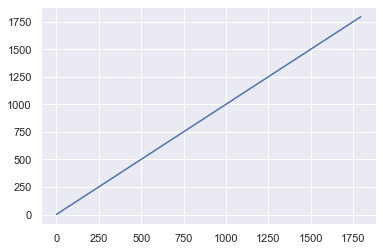

In [5]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

Данный столбец нам не пригодится, так как это просто столбец индексов батончиков, совпадающий с номером строки. Удалим этот столбец.

In [6]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

Анализируем столбец **company**

In [7]:
cacao.company.value_counts()

                          99
Soma                      45
Bonnat                    26
Fresco                    26
Pralus                    25
                          ..
Rancho San Jacinto         1
Chokolat Elot (Girard)     1
Confluence                 1
Tan Ban Skrati             1
Park 75                    1
Name: company, Length: 408, dtype: int64

In [8]:
#Отфильтруем этот столбец, убрав лишние данные (пустые компании)
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)
cacao.company.nunique()

407

Выведем только те компании, у которых больше 10 продуктов

In [9]:
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


Анализируем столбец **specific_origin** - столбец с местом происхождения бобов

In [10]:
cacao.specific_origin.value_counts()

                                   58
Madagascar                         55
Peru                               44
Ecuador                            39
Dominican Republic                 33
                                   ..
La Masica, FHIA                     1
Dominican Republic, Batch 31616     1
Agua Grande                         1
Ben Tre, Mekong Delta               1
Gru Grococo, St. Andrews            1
Name: specific_origin, Length: 1013, dtype: int64

In [11]:
#Заполним пробельные пропуски как NaN
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)
cacao.specific_origin.nunique()

1012

In [12]:
print("Значений, встретившихся в столбце более 10 раз:", (cacao.specific_origin.value_counts() > 10).sum())

Значений, встретившихся в столбце более 10 раз: 15


Столбец **ref** - числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

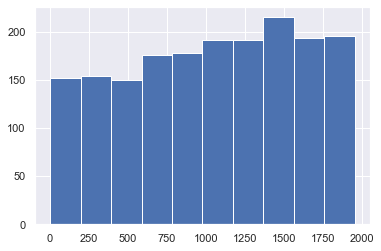

In [13]:
cacao.ref.hist()
cacao.ref.describe()

Как видно, у этого признака нормальное распределение, выбросов нет. Заметен тренд на возрастание количества отзывов со временем.

Столбец **review_date** - год публикации рецензии

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

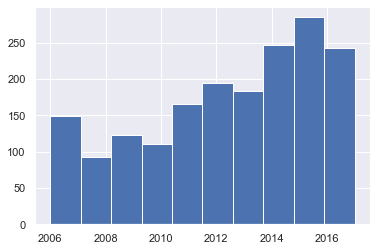

In [14]:
cacao.review_date.hist()
cacao.review_date.describe()

In [15]:
#Проверим наличие выбросов
Q1 = cacao.review_date.quantile(0.25)
Q3 = cacao.review_date.quantile(0.75)
IQR = Q3 - Q1

In [16]:
cacao[(cacao.review_date < Q1 - 1.5*IQR)|(cacao.review_date > Q3 + 1.5*IQR)]

Empty DataFrame
Columns: [company, specific_origin, ref, review_date, cocoa_percent, company_location, rating, bean_type, broad_origin]
Index: []

Выбросов не обнаружено

Столбец **cocoa_percent**

In [17]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [18]:
#Трансформируем эти данные в числа (без процентов)
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%','')))
cacao.cocoa_percent

0        63.0
1        70.0
2       670.0
3        70.0
4        70.0
        ...  
1790     70.0
1791     65.0
1792     65.0
1793     62.0
1794     65.0
Name: cocoa_percent, Length: 1795, dtype: float64

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

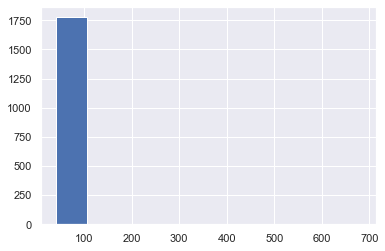

In [19]:
#Посмотрим распределение признака
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


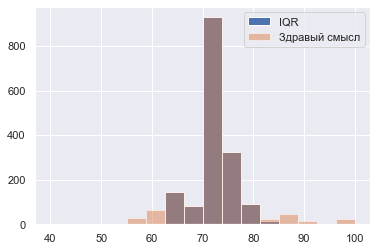

In [20]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

cacao.cocoa_percent[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend()

In [21]:
Q1 = cacao.cocoa_percent.quantile(0.25)
Q3 = cacao.cocoa_percent.quantile(0.75)
IQR = Q3 - Q1
outlier_floor = Q1 - 1.5*IQR
outlier_ceil = Q3 + 1.5*IQR
print(f'Первый квантиль: {Q1}, третий квантиль: {Q3}, межквартильный размах: {IQR}, границы выбросов: [{outlier_floor},{outlier_ceil}]')

Первый квантиль: 70.0, третий квантиль: 75.0, межквартильный размах: 5.0, границы выбросов: [62.5,82.5]


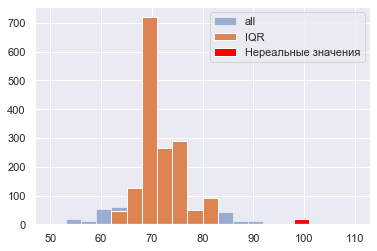

In [22]:
#Проанализируем данные графически
cacao.cocoa_percent.hist(alpha = 0.5, bins = 20, range = (50,110), label = 'all')

#Выведем на график только те данные, что не являются выбросами
cacao.cocoa_percent[cacao.cocoa_percent.between(outlier_floor, outlier_ceil)].hist(bins = 20, range = (50,110), label = 'IQR')

#Значения больше 100%?:
cacao.cocoa_percent[cacao.cocoa_percent >= 100].hist(bins = 20, range = (50, 110), label = 'Нереальные значения', color = 'red')

#Выведем легенду
plt.legend()

In [23]:
# отбросим нереальные значения (при этом удалятся строки, несоответствующие условию)
cacao = cacao[cacao.cocoa_percent <= 100]
pd.DataFrame(cacao.cocoa_percent).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cocoa_percent  1776 non-null   float64
dtypes: float64(1)
memory usage: 27.8 KB


**company_location**

In [24]:
cacao.company_location

0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

In [25]:
display(cacao.company_location.value_counts())
print(f'Значений, встретившихся более 10 раз: {(cacao.company_location.value_counts()>10).sum()}')
cacao.loc[:, ['company_location']].info()

U.S.A.            756
France            155
Canada            124
U.K.               94
Italy              63
                 ... 
Wales               1
Czech Republic      1
India               1
Suriname            1
Russia              1
Name: company_location, Length: 60, dtype: int64

Значений, встретившихся более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


**rating** - рейтинг шоколада, который и будет учиться предсказывать будущая модель

In [26]:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

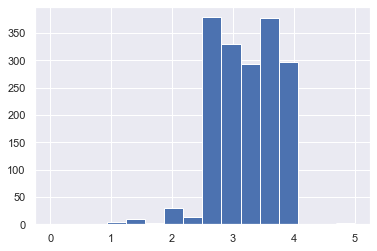

In [27]:
cacao.rating.hist(bins = 16, range =(0,5))
cacao.rating.describe()

Большинство оценок распределены между 3 и 3.5 (медиана 3.25, 25-й перцентиль 3 и 75-й — 3.5), что позволяет сделать два предположения:

- Скорее всего была использована пятибалльная шкала оценивания
- В данных есть выбросы.

Первый квантиль: 3.0, третий квантиль: 3.5, межквартильный размах: 0.5, границы выбросов: [2.25,4.25]


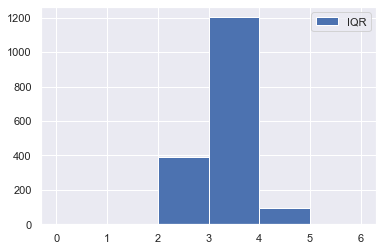

In [28]:
#Оценим данные на выбросы
Q1 = cacao.rating.quantile(0.25)
Q3 = cacao.rating.quantile(0.75)
IQR = Q3 - Q1
outlier_floor = Q1 - 1.5*IQR
outlier_ceil = Q3 + 1.5*IQR
print(f'Первый квантиль: {Q1}, третий квантиль: {Q3}, межквартильный размах: {IQR}, границы выбросов: [{outlier_floor},{outlier_ceil}]')

#Построим гистограмму распределения рейтингов без выбросов
cacao.rating[cacao.rating.between(outlier_floor, outlier_ceil)].hist(bins = 6, range = (0,6), label = 'IQR')
plt.legend()

In [29]:
#Отфильтруем данные
cacao = cacao.loc[cacao.rating.between(outlier_floor, outlier_ceil)]

**bean_type**

In [30]:
cacao.bean_type.dtypes

dtype('O')

In [31]:
#Заменим пропуски на None
cacao.bean_type = cacao.bean_type.astype('str')

In [32]:
cacao.bean_type = cacao.bean_type.astype('str').apply(lambda x: None if x.strip() == '' else x)

In [33]:
display(pd.DataFrame(cacao.bean_type.value_counts()))

bean_type
Trinitario                      401
Criollo                         147
Forastero                        81
Forastero (Nacional)             50
Criollo, Trinitario              37
Blend                            36
Forastero (Arriba)               30
Criollo (Porcelana)              10
Trinitario, Criollo               9
Forastero (Parazinho)             8
Forastero (Arriba) ASS            5
Matina                            3
Nacional (Arriba)                 3
EET                               3
Beniano                           3
Trinitario (85% Criollo)          2
Criollo (Amarru)                  2
Amazon, ICS                       2
Nacional                          2
Trinitario, Forastero             2
Criollo, Forastero                2
Amazon mix                        2
Forastero (Catongo)               2
Criollo (Ocumare 61)              2
Trinitario (Amelonado)            1
Amazon                            1
Criollo (Ocumare)                 1
Forastero(Arriba, CCN)            1
Forastero, Trinitario             1
Trinitario, Nacional              1
CCN51                             1
Trinitario, TCGA                  1
Criollo (Ocumare 77)              1
Criollo (Ocumare 67)              1
Blend-Forastero,Criollo           1
Criollo (Wild)                    1
Criollo, +                        1
Trinitario (Scavina)              1
nan                               1
Forastero (Amelonado)             1
Forastero (Arriba) ASSS           1

In [34]:
print(f"Значений, встретившихся в столбце более 10 раз: {(cacao.bean_type.value_counts() > 10).sum()}")
print(f'Уникальных значений: {cacao.bean_type.nunique()}')
cacao.loc[:, ['bean_type']].info()

Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [35]:
#Мы видим, что есть строка со значением nan, надо заменить её на None для удобства. Также мы видим, что многие типы бобов указаны с пояснением, например "Criollo (Ocumare 67)", такие значения стоит привести к общему виду.
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isna(x) else None if x == 'nan' else x if '(' not in x else x[:x.find('(')].strip())

In [36]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print('Значений, встретившихся в столбце более 10 раз:', (cacao.bean_type.value_counts() > 10).sum())
print('Уникальных значений:', cacao.bean_type.nunique())

bean_type
Trinitario                     405
Forastero                      179
Criollo                        165
Criollo, Trinitario             37
Blend                           36
Trinitario, Criollo              9
Nacional                         5
EET                              3
Matina                           3
Beniano                          3
Amazon mix                       2
Criollo, Forastero               2
Amazon, ICS                      2
Trinitario, Forastero            2
Blend-Forastero,Criollo          1
CCN51                            1
Criollo, +                       1
Trinitario, TCGA                 1
Amazon                           1
Trinitario, Nacional             1
Forastero, Trinitario            1

Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21


**broad_origin** - название региона, в котором выращены бобы

In [37]:
#Обработаем пропуски в данном столбце
display(pd.DataFrame(cacao.broad_origin.value_counts()))
cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if str(x).strip() == '' else x)

broad_origin
Venezuela                       202
Ecuador                         179
Peru                            159
Madagascar                      138
Dominican Republic              135
...                             ...
Ven, Bolivia, D.R.                1
Peru, Mad., Dom. Rep.             1
Ven., Trinidad, Mad.              1
South America, Africa             1
Venezuela, Carribean              1

[97 rows x 1 columns]

In [38]:
print(f'Уникальных значений в столбце: {cacao.broad_origin.nunique()}')
print(f'Значений, встречающихся в столбце больше 10 раз: {(cacao.broad_origin.value_counts()>10).sum()}')

Уникальных значений в столбце: 97
Значений, встречающихся в столбце больше 10 раз: 25


При этом, в столбце много повторяющихся значений с различным написанием, исправим посредством использования функции ниже

In [39]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [40]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

In [41]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

broad_origin
Venezuela                                     202
Ecuador                                       179
Peru                                          160
Madagascar                                    138
DominicanRepublic                             135
...                                           ...
Venezuela,Trinidad,Madagascar                   1
Madagascar,Ecuador                              1
Peru,Ecuador                                    1
Africa,Carribean,C.Am.                          1
Venezuela,Africa,Brasil,Peru,Mexico             1

[93 rows x 1 columns]

Значений, упомянутых более 10 раз: 25
Уникальных значений: 94
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1630 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


### Корреляционный анализ
Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

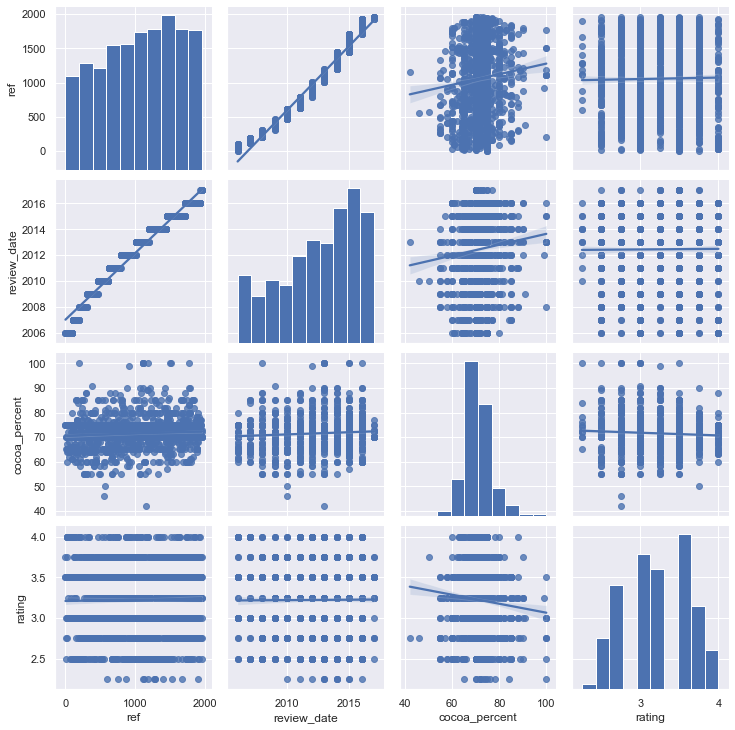

In [42]:
sns.pairplot(cacao, kind = 'reg') #Построим парные графики с линиями тренда

In [43]:
#Используем для наглядности матрицу корреляций:
cacao_corr = cacao.corr()

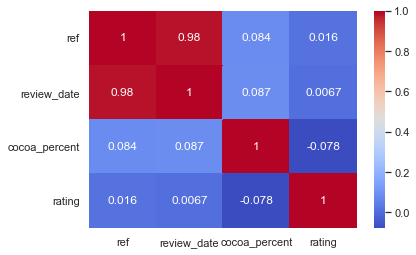

In [44]:
sns.heatmap(cacao_corr, annot = True, cmap = 'coolwarm')

Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная REF.

Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.

Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

## Анализ номинативных переменных

### Построение Boxplots

In [45]:
#Функция построения "Ящика с усами" для топ-10 значений по количеству батончиков из соответствующей колонки
def get_boxplot(column):
    #Создание объекта fig с возможностью разместить несколько графиков
    fig, axes = plt.subplots(figsize = (14,4))
    #Ящики с усами из библиотеки seaborn, x и y ищутся в data - cacao, отфильтрованы значения и взят топ 10
    sns.boxplot(x = column, y = 'rating', data = cacao[cacao[column].isin(cacao[column].value_counts().index[:10])], ax = axes)
    #Повернуть подписи
    plt.xticks(rotation = 45)
    axes.set_title('Boxplot for ' + column)
    plt.show()

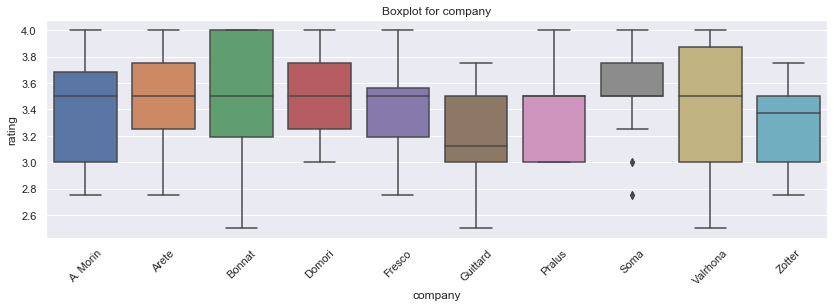

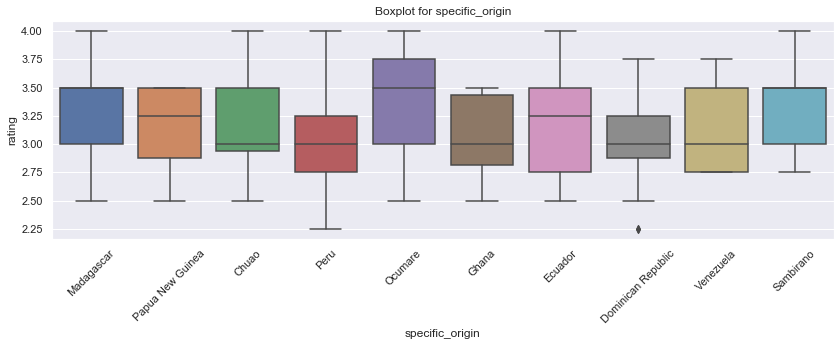

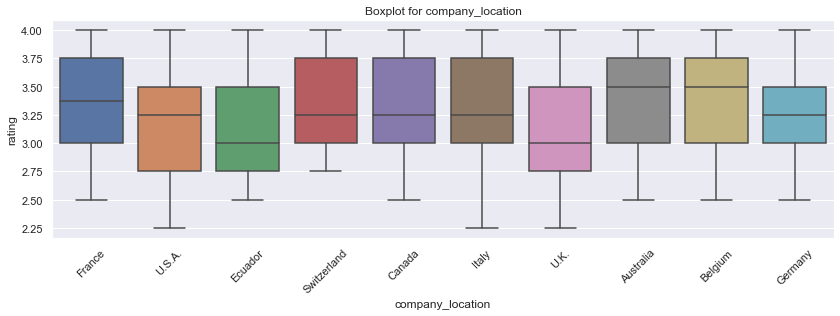

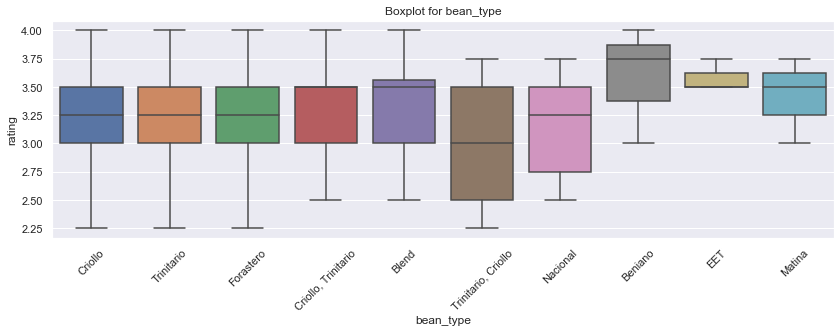

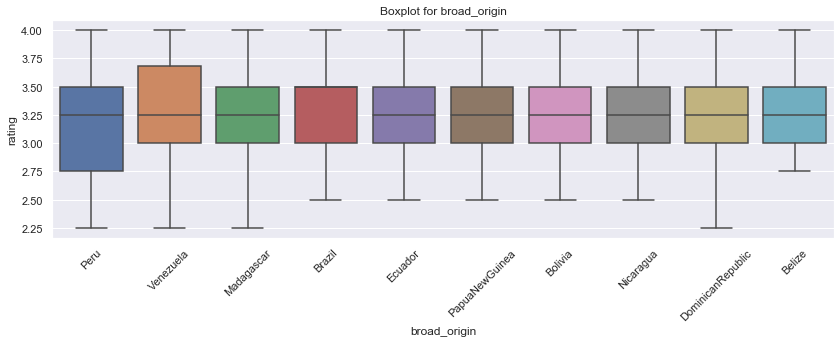

In [46]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме broad_origin, могут влиять на оценку батончика. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. 

### Тестирование гипотезы о разности средних
Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 

Проверим **нулевую гипотезу** о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [47]:
def get_stat_dif(column):
    cols = cacao[column].value_counts().index[:10] #возьмём топ-10 часто встречающихся значений
    combinations_all = list(combinations(cols, 2)) #парные сочетания из топ-10 по встречаемости значений
    for comb in combinations_all:
        if ttest_ind(cacao[cacao[column] == comb[0]]['rating'], #Выборка 2х рейтингов, соответствующих 2м рассматриваемым в кобминации значениям колонки
        #p-value двухсторонней гипотезы о неразличимости оценок батончиков для двух выборок,  
                    cacao[cacao[column] == comb[1]]['rating'],).pvalue \
            <= 0.05/len(combinations_all): #Учёт поправки Бонферони на множественную проверку гипотез
            print('Найдены статистически значимые различия для колонки', column)
            break 

In [49]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


Как мы видим, серьёзно отличаются три параметра: company,  specific_origin и  company_location. Оставим эти переменные в датасете для дальнейшего построения модели. 

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: company, specific_origin, company_location, review_date, cocoa_percent.

In [51]:
cacao_for_model = cacao[['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

company specific_origin company_location  review_date  cocoa_percent
1  A. Morin           Kpime           France         2015           70.0
3  A. Morin           Akata           France         2015           70.0
4  A. Morin          Quilla           France         2015           70.0
5  A. Morin        Carenero           France         2014           70.0
6  A. Morin            Cuba           France         2014           70.0

## Выводы

Настало время подвести выводы.

Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков были получены следующие выводы:

- В данных достаточно _мало пустых значений_, только столбец bean_type был заполнен в малом количестве случаев.
- _Выбросы найдены только_ в столбцах с _рейтингом и содержанием какао_ в шоколаде батончиков, что позволяет сделать вывод о том, что данные достаточно чистые.
- _Положительная корреляция параметра review_date и rating_ может говорить о том, что с годами _рейтинги потихоньку завышаются_, либо _батончики становятся лучше_.
- Самые важные _параметры_, которые предлагается использовать в дальнейшем _для построения модели_, это company, specific_origin, company_location, review_date и cocoa_percent.